In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [2]:
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv("../data/processed.cleveland.data", header=None, names=columns, sep=",")

print("Shape:", df.shape)
df.head()

Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Replace "?" with NaN
df = df.replace("?", np.nan)

# Convert all columns to numeric (NaNs stay as NaN)
df = df.apply(pd.to_numeric, errors="ignore")

# Drop rows with missing values
df = df.dropna()

print("Shape after dropping missing:", df.shape)
df.head()


Shape after dropping missing: (297, 14)


C:\Users\hp\AppData\Local\Temp\ipykernel_25064\1789669841.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Convert target into binary classification: 0 = no disease, 1 = disease
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

# Ensure sex is integer
df["sex"] = df["sex"].astype(int)

df["target"].value_counts()


target
0    160
1    137
Name: count, dtype: int64

In [5]:
# Apply one-hot encoding to categorical features
categorical_cols = ["cp", "restecg", "slope", "thal"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert any booleans to integers
for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)

print("Shape after encoding:", df.shape)
df.head()


Shape after encoding: (297, 19)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,0,1,0,1,1,0
1,67.0,1,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1,0,0,1,0,1,1,0,0,0
2,67.0,1,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,0,0,1,0,1,1,0,0,1
3,37.0,1,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,0,0,0,1,0,0
4,41.0,0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,1,0,0,0,0


In [6]:
scaler = StandardScaler()

X = df.drop("target", axis=1)
y = df["target"]

X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled["target"] = y.values

df_scaled.head()




,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,target
0,0.936181,0.691095,0.750380,-0.276443,2.430427,0.017494,-0.696419,1.068965,-0.721976,-0.444500,-0.622776,-0.957146,-0.116841,1.016979,-0.925338,3.625308,3.937004,-0.794901,0
1,1.378929,0.691095,1.596266,0.744555,-0.411450,-1.816334,1.435916,0.381773,2.478425,-0.444500,-0.622776,1.044772,-0.116841,1.016979,1.080686,-0.275839,-0.254000,-0.794901,1
2,1.378929,0.691095,-0.659431,-0.353500,-0.411450,-0.899420,1.435916,1.326662,1.411625,-0.444500,-0.622776,1.044772,-0.116841,1.016979,1.080686,-0.275839,-0.254000,1.258018,1
3,-1.941680,0.691095,-0.095506,0.051047,-0.411450,1.633010,-0.696419,2.099753,-0.721976,-0.444500,1.605713,-0.957146,-0.116841,-0.983304,-0.925338,3.625308,-0.254000,-0.794901,0
4,-1.498933,-1.446980,-0.095506,-0.835103,-0.411450,0.978071,-0.696419,0.295874,-0.721976,2.249717,-0.622776,-0.957146,-0.116841,1.016979,-0.925338,-0.275839,-0.254000,-0.794901,0


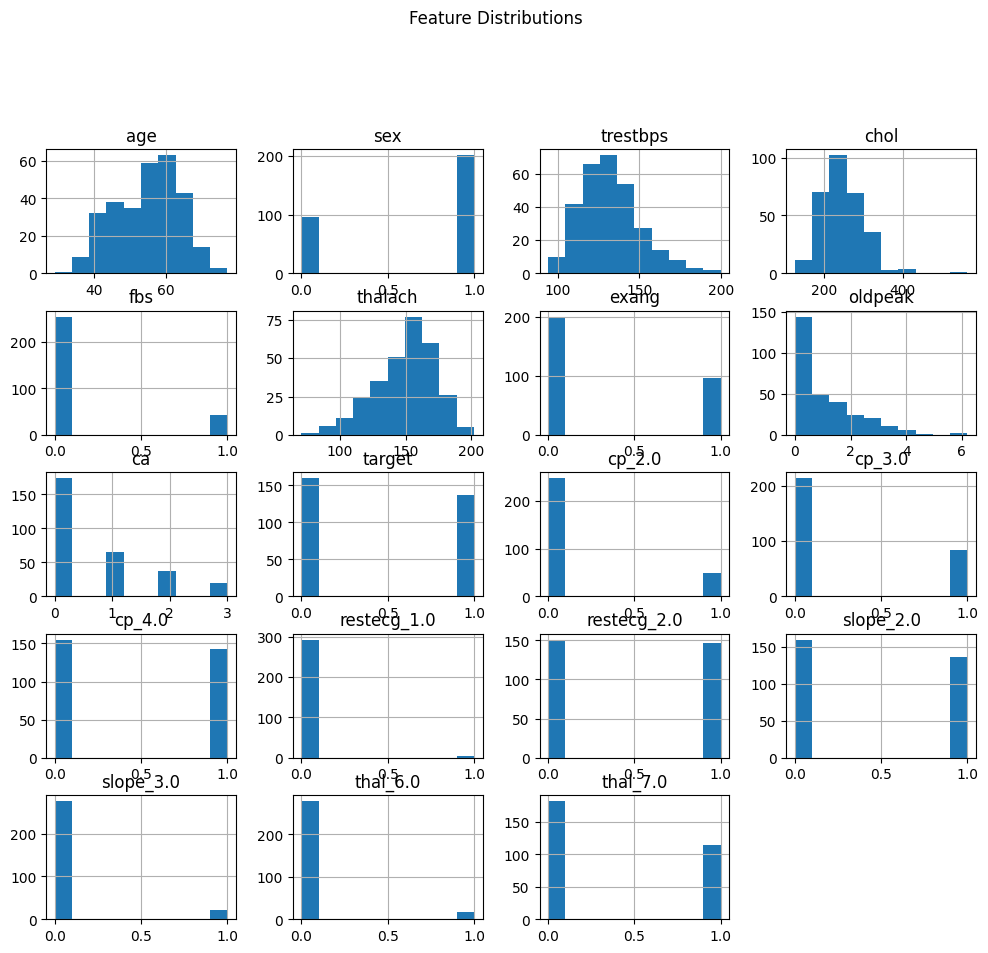

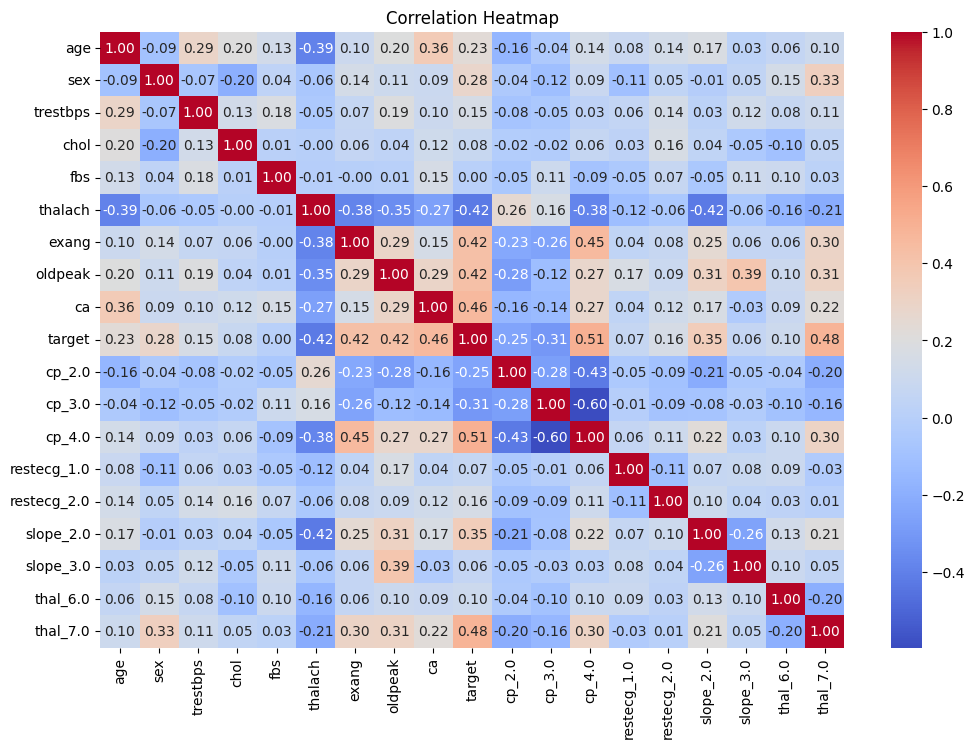

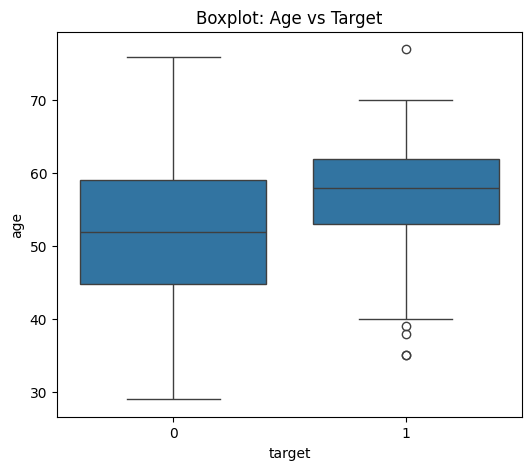

In [7]:
# Histograms
df.hist(figsize=(12,10))
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# Correlation Heatmap (before scaling for interpretability)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Boxplot example: Age vs Target
plt.figure(figsize=(6,5))
sns.boxplot(x="target", y="age", data=df)
plt.title("Boxplot: Age vs Target")
plt.show()


In [8]:
df_scaled.to_csv("../data/heart_clean_encoded.csv", index=False)
print("Saved cleaned dataset as heart_clean_encoded.csv with shape:", df_scaled.shape)


Saved cleaned dataset as heart_clean_encoded.csv with shape: (297, 19)
